In [18]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from scipy import stats

In [19]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [95,96,97,98,99,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [20]:
def get_nsl_results(net_type, deck):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
        
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'.json').read())    
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds

KeyError: 'noise_pct_95'

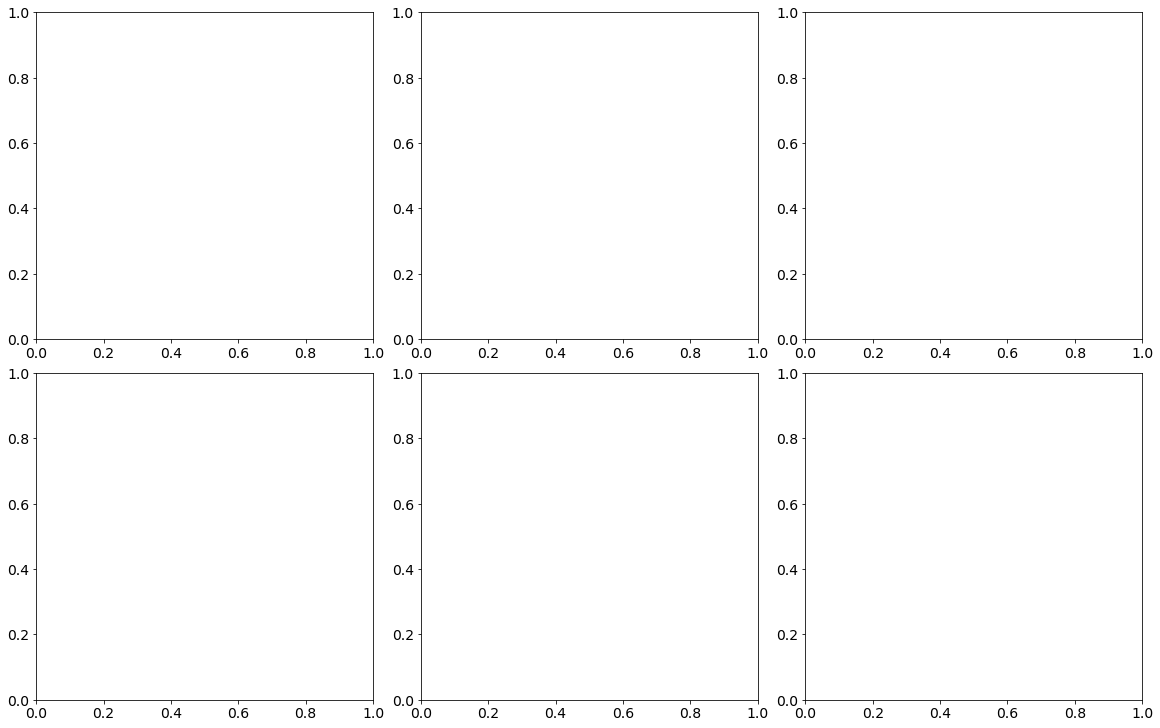

In [15]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]


nps_x = noise_pcts
for i in range(5):
  
    # Softmax
    softmax_ratios, softmax_err = get_nsl_results('softmax', decks[i])
    axes[i].plot(nps_x, softmax_ratios, label = "FF-NSL Softmax 104 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=7,linestyle='-.')
    
    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_nsl_results('edl_gen', decks[i])
    axes[i].plot(nps_x, edl_gen_ratios, label = "FF-NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=7,linestyle='-.')
    
    # Constant
    constant_ratios, constant_err = get_nsl_results('constant_softmax', decks[i])
    axes[i].plot(nps_x, constant_ratios, label = "FF-NSL Softmax (constant penalty) 104 examples", color="m", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')
    
    constant_ratios, constant_err = get_nsl_results('constant_edl_gen', decks[i])
    axes[i].plot(nps_x, constant_ratios, label = "FF-NSL EDL-GEN (constant penalty) 104 examples", color="tab:orange", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')
    
    
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_title(decks[i])

# Legend
f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
f2_ax6.get_xaxis().set_visible(False)
f2_ax6.get_yaxis().set_visible(False)
f2_ax6.set_title('Legend')
    
plt.show()

# 95-100% 20 repeats

In [5]:
def get_nsl_results_constant_comparison(net_type, deck):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
        
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'_extra.json').read())   
    np_more_repeats_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'_more_repeats.json').read())
    
    for n in noise_pcts:
        raw = np_res['noise_pct_'+str(n)][acc_metric]['raw'] + np_more_repeats_res['noise_pct_'+str(n)][acc_metric]['raw']
        acc.append(np.mean(raw))
        acc_stds.append(stats.sem(raw))
    return acc, acc_stds

In [6]:
def plot_one(deck_id):
    fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[0, 0])
    # f2_ax2 = fig2.add_subplot(spec2[0, 1])
    # f2_ax3 = fig2.add_subplot(spec2[0, 2])
    # f2_ax4 = fig2.add_subplot(spec2[1, 0])
    # f2_ax5 = fig2.add_subplot(spec2[1, 1])
    # f2_ax6 = fig2.add_subplot(spec2[1, 2])

    # axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]
    axes = [f2_ax1]


    nps_x = noise_pcts
    i = deck_id

    # Softmax
    softmax_ratios, softmax_err = get_nsl_results_constant_comparison('softmax', decks[i])
    axes[0].plot(nps_x, softmax_ratios, label = "FF-NSL Softmax 104 examples", color="b", linestyle='-.')
    axes[0].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=7,linestyle='-.')

    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_nsl_results_constant_comparison('edl_gen', decks[i])
    axes[0].plot(nps_x, edl_gen_ratios, label = "FF-NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes[0].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=7,linestyle='-.')

    # Constant
    constant_ratios, constant_err = get_nsl_results_constant_comparison('constant_softmax', decks[i])
    axes[0].plot(nps_x, constant_ratios, label = "FF-NSL Softmax (constant penalty) 104 examples", color="r", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="r", capsize=5,linestyle=':')

    constant_ratios, constant_err = get_nsl_results_constant_comparison('constant_edl_gen', decks[i])
    axes[0].plot(nps_x, constant_ratios, label = "FF-NSL EDL-GEN (constant penalty) 104 examples", color="g", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="g", capsize=5,linestyle=':')




    axes[0].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[0].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[0].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
    axes[0].grid(True)
    axes[0].set_title(decks[i])

    # Legend
    plt.legend()

    plt.show()

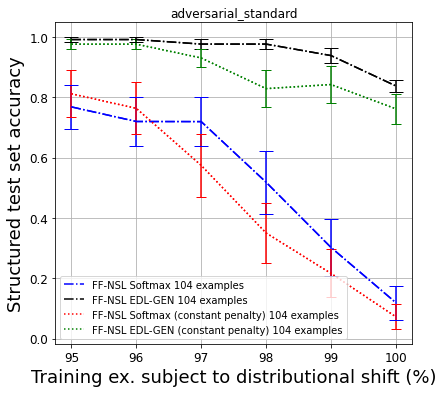

In [37]:
# 95-100% Adversarial Standard
plot_one(2)

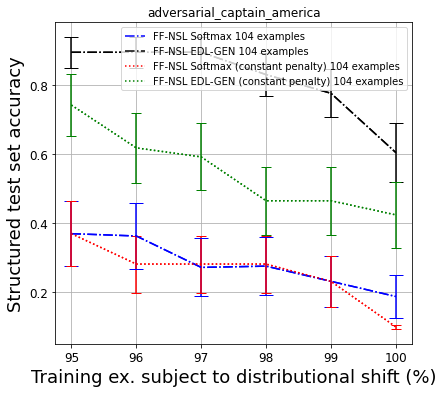

In [9]:
# 95-100% Adversarial Captain America
plot_one(4)

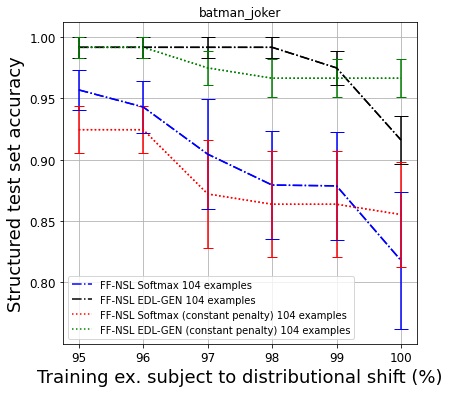

In [10]:
# 95-100% Batman Joker
plot_one(0)

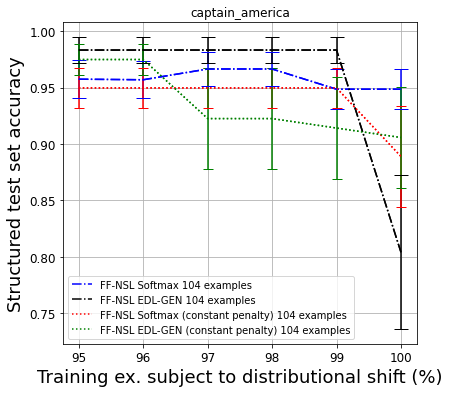

In [11]:
# 95-100% Captain America
plot_one(1)

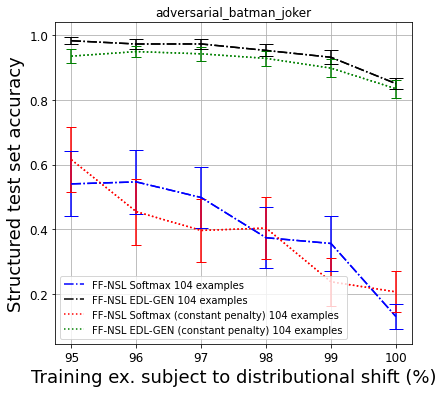

In [12]:
# 95-100% Adversarial Batman Joker
plot_one(3)

# 95-100% 50 repeats

In [21]:
def get_nsl_results_constant_comparison_50_repeats(net_type, deck):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
        
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'_more_repeats.json').read())   
    
    for n in noise_pcts:
        raw = np_res['noise_pct_'+str(n)][acc_metric]['raw']
        acc.append(np.mean(raw))
        acc_stds.append(stats.sem(raw))
    return acc, acc_stds

In [22]:
def get_pct_symbolic_perturbs(net_type, deck, test_set=False):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    if test_set:
        file_name_add = '_test_set_more_repeats'
    else:
        file_name_add = '_more_repeats'
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+file_name_add+'.json').read())
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

In [31]:
get_nsl_results_constant_comparison_50_repeats('constant_edl_gen', 'adversarial_captain_america')

([0.694925074925075,
  0.5796403596403598,
  0.5374025974025974,
  0.4678121878121878,
  0.45022977022977023,
  0.39184815184815186],
 [0.05895544535682718,
  0.06454897264249781,
  0.06363125630965451,
  0.06361416551068245,
  0.0630395038001632,
  0.059696621872492604])

In [23]:
def plot_one_50(deck_id):
    fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[0, 0])
    # f2_ax2 = fig2.add_subplot(spec2[0, 1])
    # f2_ax3 = fig2.add_subplot(spec2[0, 2])
    # f2_ax4 = fig2.add_subplot(spec2[1, 0])
    # f2_ax5 = fig2.add_subplot(spec2[1, 1])
    # f2_ax6 = fig2.add_subplot(spec2[1, 2])

    # axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]
    axes = [f2_ax1]


    nps_x = noise_pcts
    i = deck_id

    # Softmax
    softmax_ratios, softmax_err = get_nsl_results_constant_comparison_50_repeats('softmax', decks[i])
    axes[0].plot(nps_x, softmax_ratios, label = "FFNSL Softmax 104 examples", color="b", linestyle='-.')
    axes[0].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=7,linestyle='-.')

    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_nsl_results_constant_comparison_50_repeats('edl_gen', decks[i])
    axes[0].plot(nps_x, edl_gen_ratios, label = "FFNSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes[0].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=7,linestyle='-.')

    # Constant
    constant_ratios, constant_err = get_nsl_results_constant_comparison_50_repeats('constant_softmax', decks[i])
    axes[0].plot(nps_x, constant_ratios, label = "FFNSL Softmax (constant penalty) 104 examples", color="m", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')

    constant_ratios, constant_err = get_nsl_results_constant_comparison_50_repeats('constant_edl_gen', decks[i])
    print(constant_ratios)
    axes[0].plot(nps_x, constant_ratios, label="FFNSL EDL-GEN (constant penalty) 104 examples", color="tab:orange", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')

    axes[0].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[0].set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[0].set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
    axes[0].grid(True)
#     axes[0].set_title(decks[i])
    
    plt.savefig('structured_test_data/'+decks[i]+'_follow_suit_structured_test_data_95_100_results.pdf', format='pdf', bbox_inches='tight')

    # Legend
#     plt.legend()

    plt.show()

In [12]:
def plot_one_50_zoomed(deck_id):
    fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[0, 0])
    # f2_ax2 = fig2.add_subplot(spec2[0, 1])
    # f2_ax3 = fig2.add_subplot(spec2[0, 2])
    # f2_ax4 = fig2.add_subplot(spec2[1, 0])
    # f2_ax5 = fig2.add_subplot(spec2[1, 1])
    # f2_ax6 = fig2.add_subplot(spec2[1, 2])

    # axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]
    axes = [f2_ax1]


    nps_x = noise_pcts
    i = deck_id

    # Softmax
    softmax_ratios, softmax_err = get_nsl_results_constant_comparison_50_repeats('softmax', decks[i])
    axes[0].plot(nps_x, softmax_ratios, label = "FF-NSL Softmax 104 examples", color="b", linestyle='-.')
    axes[0].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=7,linestyle='-.')

    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_nsl_results_constant_comparison_50_repeats('edl_gen', decks[i])
    axes[0].plot(nps_x, edl_gen_ratios, label = "FF-NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes[0].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=7,linestyle='-.')

    # Constant
    constant_ratios, constant_err = get_nsl_results_constant_comparison_50_repeats('constant_softmax', decks[i])
    axes[0].plot(nps_x, constant_ratios, label = "FF-NSL Softmax (constant penalty) 104 examples", color="r", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="r", capsize=5,linestyle=':')

    constant_ratios, constant_err = get_nsl_results_constant_comparison_50_repeats('constant_edl_gen', decks[i])
    axes[0].plot(nps_x, constant_ratios, label="FF-NSL EDL-GEN (constant penalty) 104 examples", color="g", linestyle=':')
    axes[0].errorbar(nps_x, constant_ratios, yerr=constant_err, color="g", capsize=5,linestyle=':')

    axes[0].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[0].set_xlabel('Training examples subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[0].set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
    axes[0].grid(True)
#     axes[0].set_title(decks[i])
    axes[0].set_ylim([0.8,1.01])
    
    plt.savefig('structured_test_data/'+decks[i]+'_follow_suit_structured_test_data_95_100_zoomed_results.pdf', format='pdf', bbox_inches='tight')

    # Legend
#     plt.legend()

    plt.show()

[0.98993006993007, 0.98993006993007, 0.9832167832167832, 0.9765034965034965, 0.973146853146853, 0.9664335664335664]


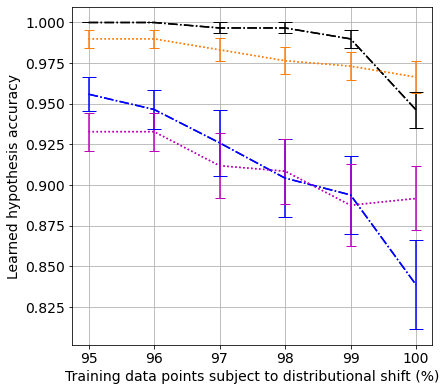

[0.9510089910089912, 0.9510089910089912, 0.93006993006993, 0.9158441558441558, 0.9124875124875125, 0.9057742257742258]


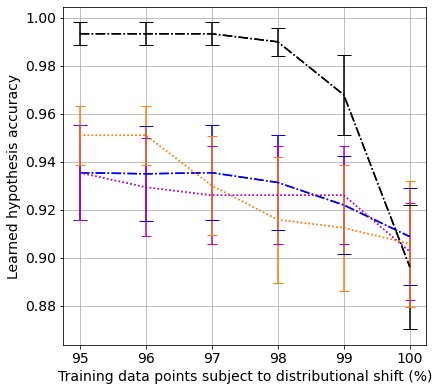

[0.9754045954045953, 0.9692707292707293, 0.9517882117882118, 0.8842557442557443, 0.8768631368631368, 0.8039160839160838]


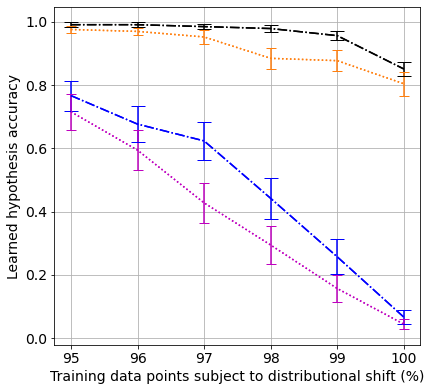

[0.9323476523476524, 0.934905094905095, 0.9288311688311688, 0.9239360639360641, 0.8932067932067932, 0.8285114885114885]


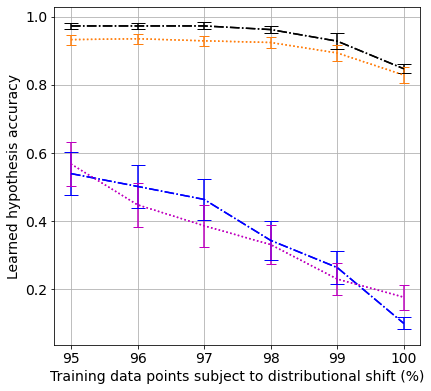

[0.7125074925074926, 0.5797402597402598, 0.5549850149850151, 0.4678121878121878, 0.45022977022977023, 0.39184815184815186]


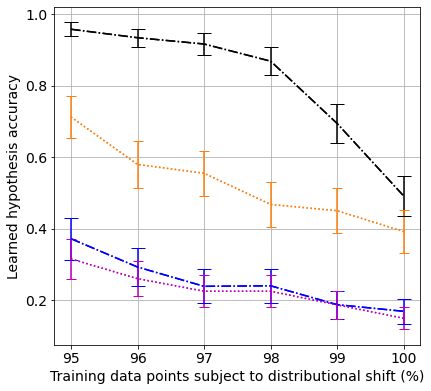

In [17]:
for d in range(5):
    plot_one_50(d)

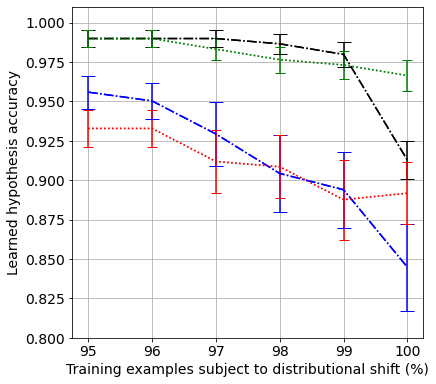

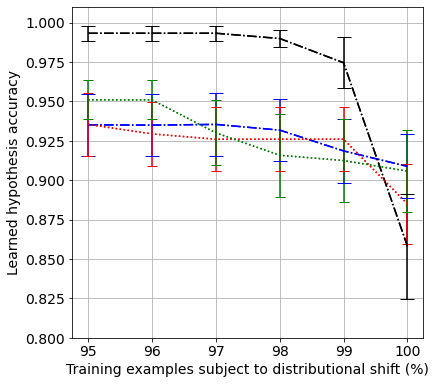

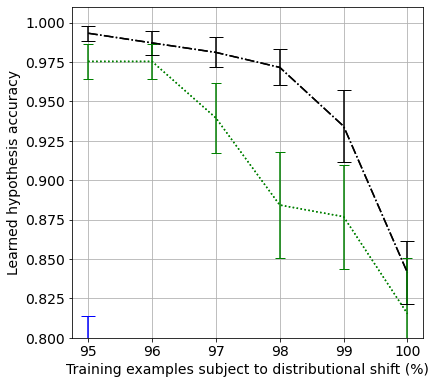

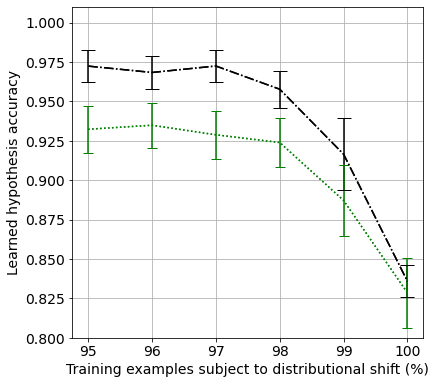

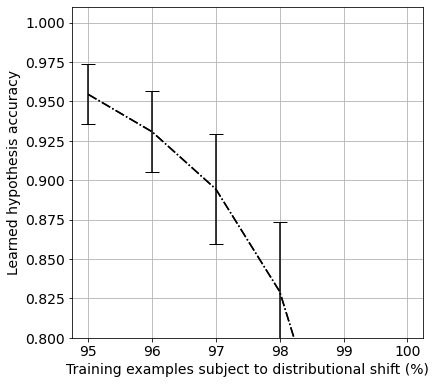

In [11]:
# Zoomed
for d in range(5):
    plot_one_50_zoomed(d)

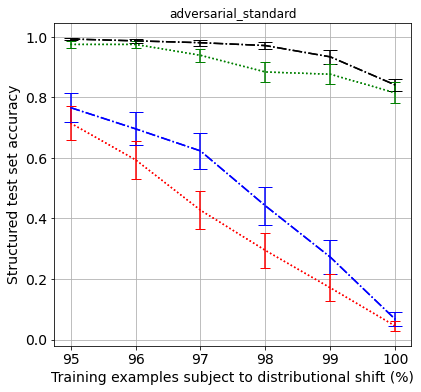

In [14]:
# 95-100% Adversarial Standard
plot_one_50(2)

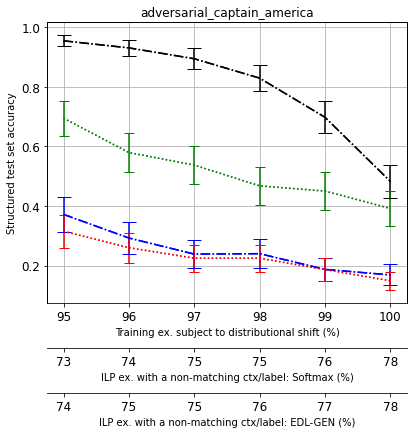

In [33]:
# 95-100% Adversarial Captain America
plot_one_50(4)

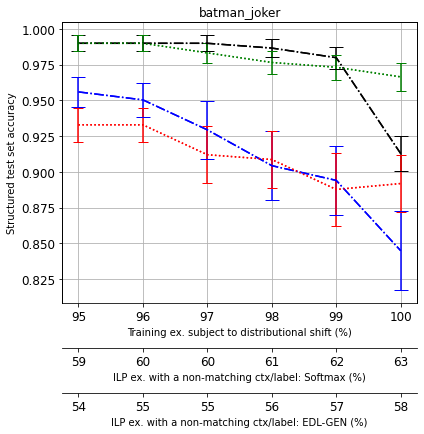

In [34]:
# 95-100% Batman Joker
plot_one_50(0)

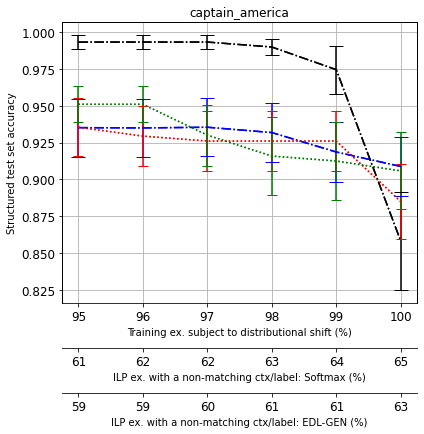

In [35]:
# 95-100% Captain America
plot_one_50(1)

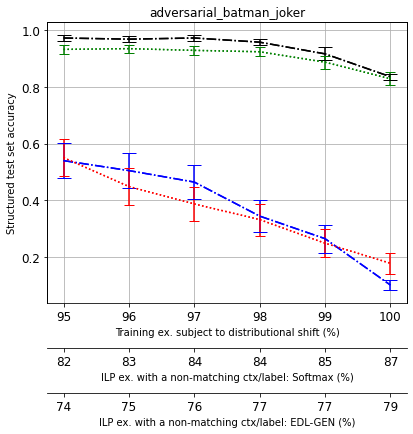

In [36]:
# 95-100% Adversarial Batman Joker
plot_one_50(3)